# 🔮 Predict & Evaluate — House Price Model (Train vs Test)

This notebook loads the **saved pipeline** (`models/house_price_model.pkl`), loads the dataset from `data/`, and evaluates performance on **train** and **test** splits. It also shows a quick **Actual vs Predicted** plot on the test set.

## 1) Setup & Imports

In [1]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


## 2) Load trained model

In [2]:
model_path = os.path.join('models', 'house_price_model.pkl')
if not os.path.exists(model_path):
    raise FileNotFoundError('❌ Trained model not found. Run the training notebook first.')
model = joblib.load(model_path)
print(f'✅ Loaded model: {model_path}')

✅ Loaded model: models\house_price_model.pkl


## 3) Load dataset (prefers `data/`)

In [3]:
CANDIDATES = [
    'data/AmesHousing.csv',
    'data/train.csv',
    'AmesHousing.csv',
    'train.csv',
]
csv_path = next((p for p in CANDIDATES if os.path.exists(p)), None)
if csv_path is None:
    raise FileNotFoundError('❌ Dataset not found. Place AmesHousing.csv in ./data/')
df = pd.read_csv(csv_path)
print(f'📄 Using dataset: {csv_path} — rows: {len(df)}')
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

📄 Using dataset: data/AmesHousing.csv — rows: 2930


## 4) Split data into Train/Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
len(X_train), len(X_test)

(2344, 586)

## 5) Helper to compute metrics

In [5]:
def metrics(y_true, y_pred):
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae = float(mean_absolute_error(y_true, y_pred))
    r2 = float(r2_score(y_true, y_pred))
    return rmse, mae, r2

## 6) Evaluate on Train set

In [6]:
train_preds = model.predict(X_train)
train_rmse, train_mae, train_r2 = metrics(y_train, train_preds)
print(f'Train → RMSE: {train_rmse:.2f} | MAE: {train_mae:.2f} | R²: {train_r2:.4f}')

Train → RMSE: 3725.66 | MAE: 2707.40 | R²: 0.9977


## 7) Evaluate on Test set (unseen data)

In [7]:
test_preds = model.predict(X_test)
test_rmse, test_mae, test_r2 = metrics(y_test, test_preds)
print(f'Test  → RMSE: {test_rmse:.2f} | MAE: {test_mae:.2f} | R²: {test_r2:.4f}')

Test  → RMSE: 3685.11 | MAE: 2690.59 | R²: 0.9983


## 8) Plot: Actual vs Predicted (Test set)

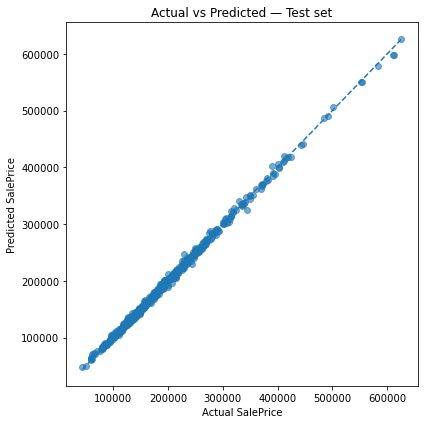

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, test_preds, alpha=0.6)
lo = min(y_test.min(), test_preds.min())
hi = max(y_test.max(), test_preds.max())
plt.plot([lo, hi], [lo, hi], linestyle='--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted — Test set')
plt.tight_layout()
plt.show()

## 9) Summary table: Train vs Test

In [9]:
summary = pd.DataFrame([
    {'Split': 'Train', 'RMSE': train_rmse, 'MAE': train_mae, 'R2': train_r2},
    {'Split': 'Test',  'RMSE': test_rmse,  'MAE': test_mae,  'R2': test_r2},
])
summary

,Split,RMSE,MAE,R2
0,Train,3725.657123,2707.401855,0.997665
1,Test,3685.114109,2690.587158,0.998306
